In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import add_changepoints_to_plot

In [16]:
df = pd.read_excel("RBI.xlsx", engine="openpyxl")
df.shape

(121, 2)

In [17]:
df["Date"] = pd.to_datetime(df["Date"])

In [20]:
df = df.rename({
    "Date": "ds",
    "Value": "y"
}, axis="columns")

In [21]:
df.head()

,ds,y
0,2020-06-01,4764.812000
1,2020-06-02,4781.974663
2,2020-06-03,4426.915552
3,2020-06-04,4424.531824
4,2020-06-05,4321.009311


In [22]:
train = df[(df["ds"] >= "2020-06-01") & (df["ds"] <= "2020-09-25")]
test = df[(df["ds"] > "2020-09-25")]

In [23]:
train.shape, test.shape

((117, 2), (4, 2))

In [24]:
model = Prophet(
    interval_width=0.95,
    yearly_seasonality=True
)

In [25]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
model.params

{'k': array([[-0.14650532]]),
 'm': array([[0.86792157]]),
 'delta': array([[ 1.92473887e-09, -7.81315675e-09, -1.23581867e-09,
          2.23310158e-10,  1.47981492e-08, -9.61992250e-09,
          7.70841322e-09,  1.49194332e-09, -6.17209352e-09,
         -2.77397123e-10, -4.81959818e-09, -2.34630652e-08,
         -5.24853435e-09, -6.52742181e-09,  5.83222546e-09,
          1.63617660e-10, -9.26672617e-09,  1.74554877e-09,
          6.68432113e-09,  2.67872917e-08, -2.66998395e-09,
         -2.22536937e-09,  2.78390208e-09,  2.18245671e-09,
          7.55015478e-09]]),
 'sigma_obs': array([[0.05141327]]),
 'beta': array([[-0.13312068,  0.11163132,  0.07515329, -0.12086717,  0.00107322,
         -0.04966063,  0.05232233,  0.16125723, -0.02631919, -0.04886097,
         -0.16783094, -0.03678182,  0.17964302, -0.02660861,  0.09695753,
         -0.09220889, -0.14932847,  0.30776131,  0.01954543,  0.37984502,
         -0.05803455,  0.06693928,  0.07312624, -0.04447407, -0.06971392,
        

In [27]:
future_df = model.make_future_dataframe(periods=104)

In [28]:
future_df.tail()

,ds
216,2021-01-03
217,2021-01-04
218,2021-01-05
219,2021-01-06
220,2021-01-07


In [29]:
forecast = model.predict(future_df)

In [30]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-01,4482.962471,3797.298462,4815.610849,4482.962471,4482.962471,-145.888325,-145.888325,-145.888325,314.996699,314.996699,314.996699,-460.885024,-460.885024,-460.885024,0.0,0.0,0.0,4337.074145
1,2020-06-02,4476.438980,4030.501866,5079.504566,4476.438980,4476.438980,82.290567,82.290567,82.290567,323.365265,323.365265,323.365265,-241.074698,-241.074698,-241.074698,0.0,0.0,0.0,4558.729547
2,2020-06-03,4469.915490,4166.734042,5163.264952,4469.915490,4469.915490,190.583371,190.583371,190.583371,261.971551,261.971551,261.971551,-71.388180,-71.388180,-71.388180,0.0,0.0,0.0,4660.498861
3,2020-06-04,4463.391999,4144.886287,5178.474123,4463.391999,4463.391999,195.046223,195.046223,195.046223,146.086628,146.086628,146.086628,48.959595,48.959595,48.959595,0.0,0.0,0.0,4658.438222
4,2020-06-05,4456.868509,4290.132386,5332.063621,4456.868509,4456.868509,339.370712,339.370712,339.370712,217.260223,217.260223,217.260223,122.110489,122.110489,122.110489,0.0,0.0,0.0,4796.239220


In [31]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
216,2021-01-03,4646.183500,4112.481832,5175.857829
217,2021-01-04,5969.368075,5487.621107,6505.184837
218,2021-01-05,5677.805987,5142.330595,6186.924810
219,2021-01-06,5254.887619,4736.965178,5794.474289
220,2021-01-07,4726.310803,4252.316125,5237.876175


In [32]:
f_df = pd.concat([df.set_index("ds")["y"], forecast.set_index("ds")["yhat"]], axis=1)
f_df.head()

,y,yhat
ds,,
2020-06-01,4764.812000,4337.074145
2020-06-02,4781.974663,4558.729547
2020-06-03,4426.915552,4660.498861
2020-06-04,4424.531824,4658.438222
2020-06-05,4321.009311,4796.239220


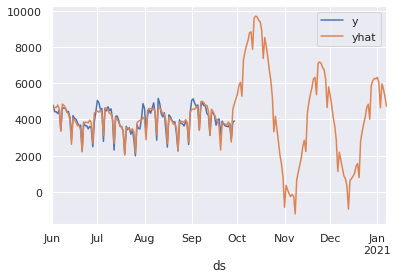

In [34]:
f_df.plot()
plt.show()

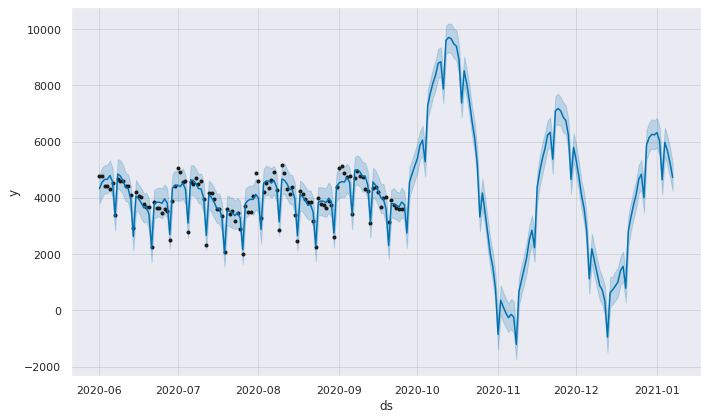

In [36]:
fig1 = model.plot(forecast)

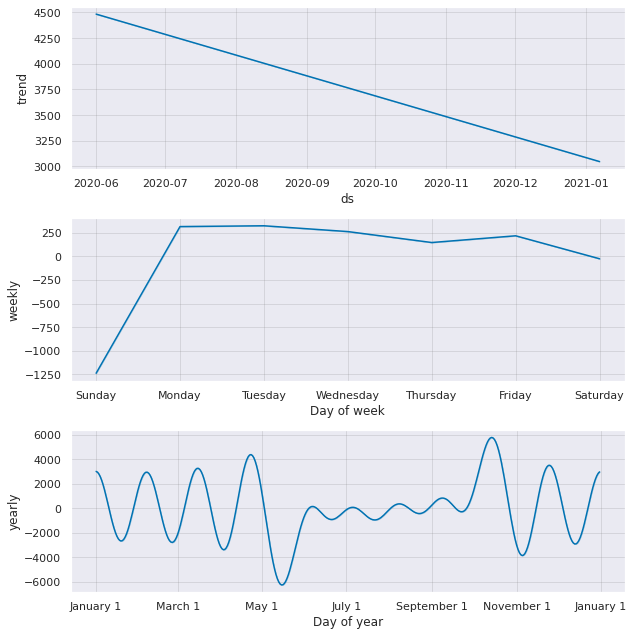

In [37]:
fig2 = model.plot_components(forecast)

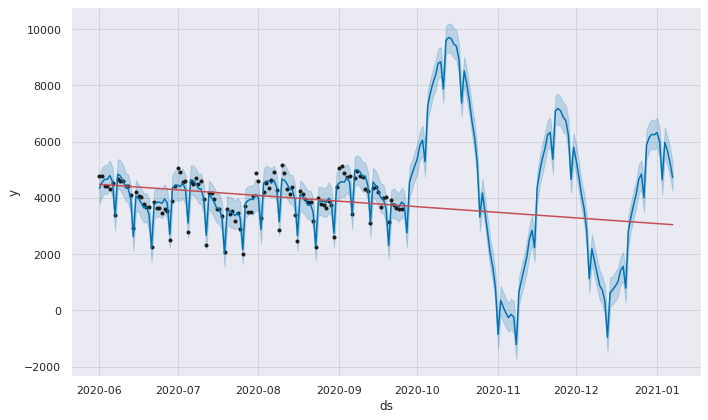

In [39]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()